# Histograms all the loads within all the houses
This notebook creates histograms of all the loads in all the houses to investigate which ones will
be interesting to investigate further.

Loads that have distinct patterns will have clearly defined peaks.

Houses like 91341 do not have a monitor that can be controlled

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns
import numpy as np
from os import path
from os import getcwd, listdir
path_to_data = path.join('..', 'data', 'houses')
sns.set()
# days = [['2019-01-01','2019-02-01'], '2019-04-01', '2019-07-01', '2019-12-01']
days = ['2019']

cwd = os.path.abspath('.')
ids = [''.join(filter(str.isdigit, s)) for s in glob.glob('../data/*.csv')]


def show_energy(id):
    h = pd.read_csv(path.join(path_to_data,str(id)+'.csv'))
    h = h.drop('Unnamed: 0', axis=1)
    h = h.set_index('reading_datetime')
    h.index = pd.to_datetime(h.index)


    monitors = h.circuit_id.unique()

    n_monitors = len(monitors)

    fig, ax = plt.subplots(n_monitors, ncols=1, figsize=(9,20))
    fig.suptitle(id)
    h.head()
    for i, d in enumerate(days):
        day = h.loc[d]
        for j, m in enumerate(monitors):
            energy = day.loc[day.circuit_id == m]
            power = (energy.energy_pos * 12) / 1000
            hist, bins = np.histogram(power, bins=20)
            hist[np.where(hist >= 50000)] = 0
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:]) / 2
            ax[j].bar(center, hist, align='center', width=width)
            ax[j].set_title(energy.monitors[0])
    plt.tight_layout()
    plt.show()


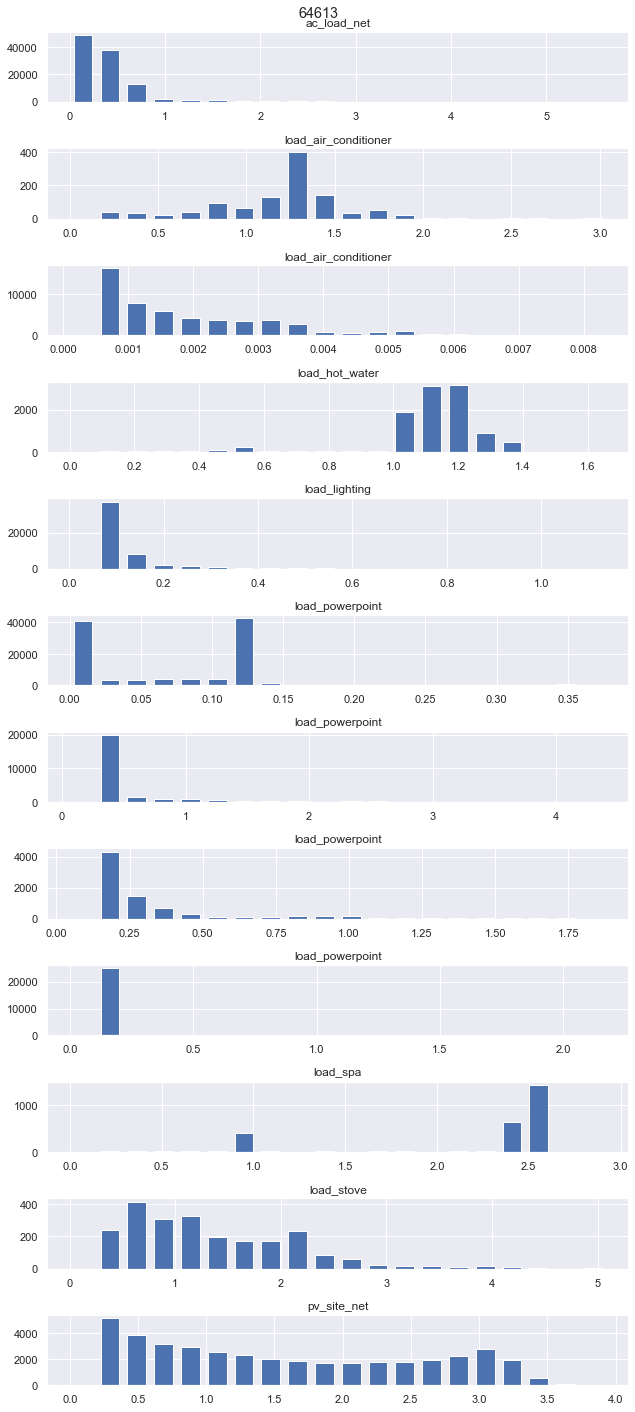

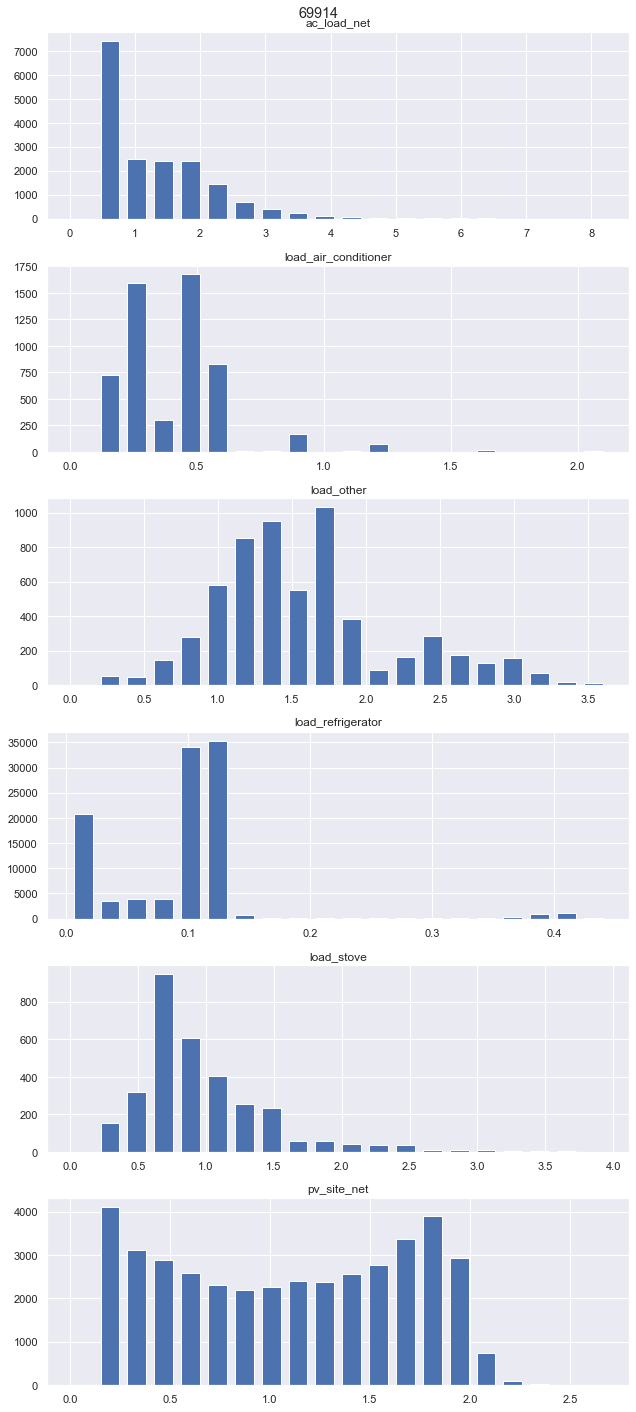

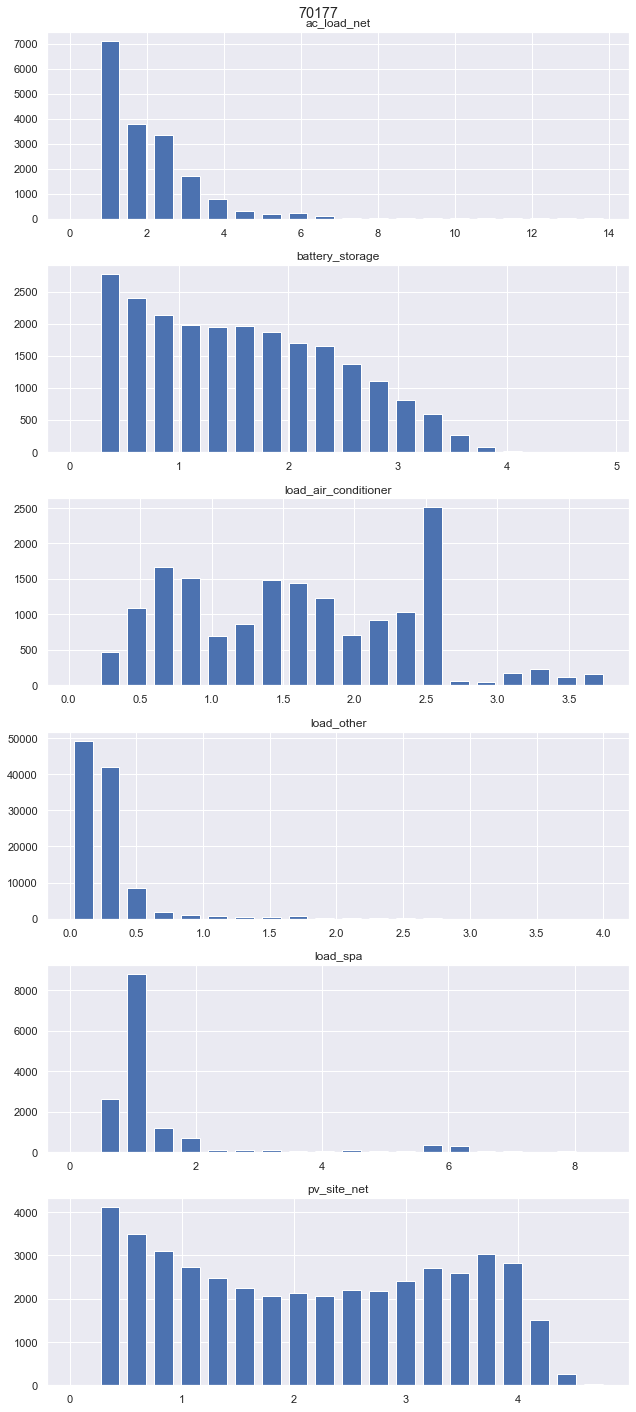

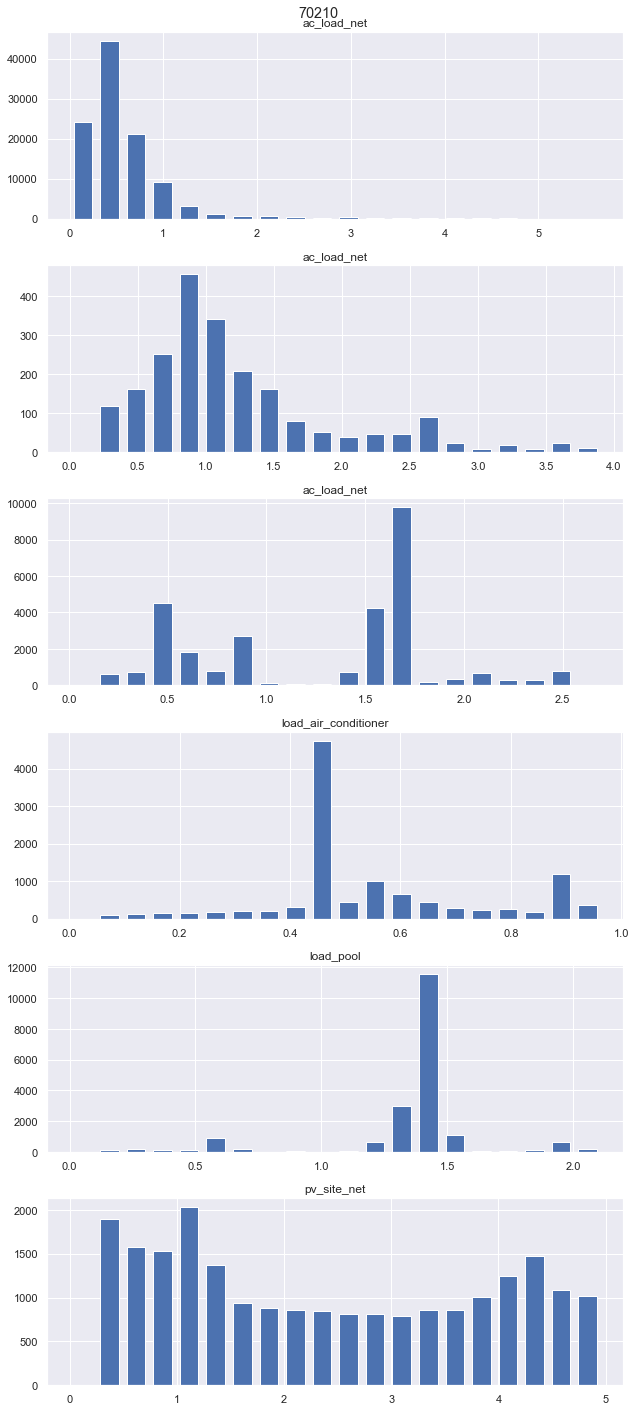

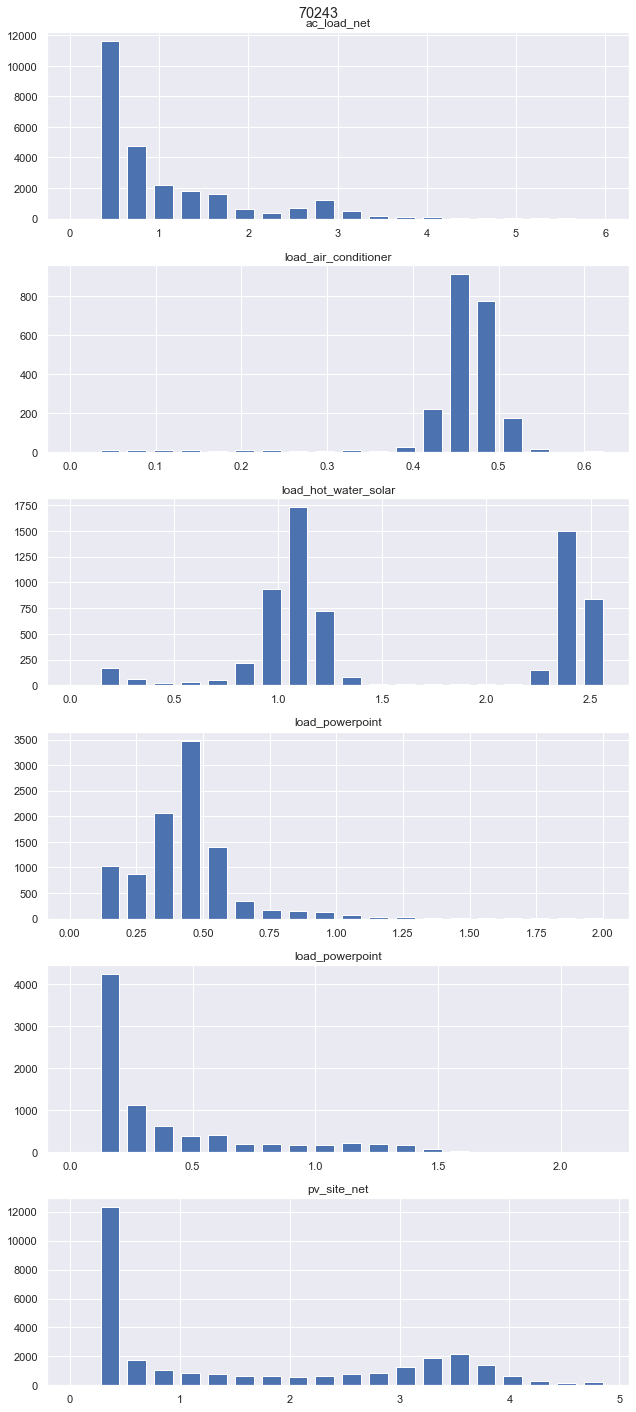

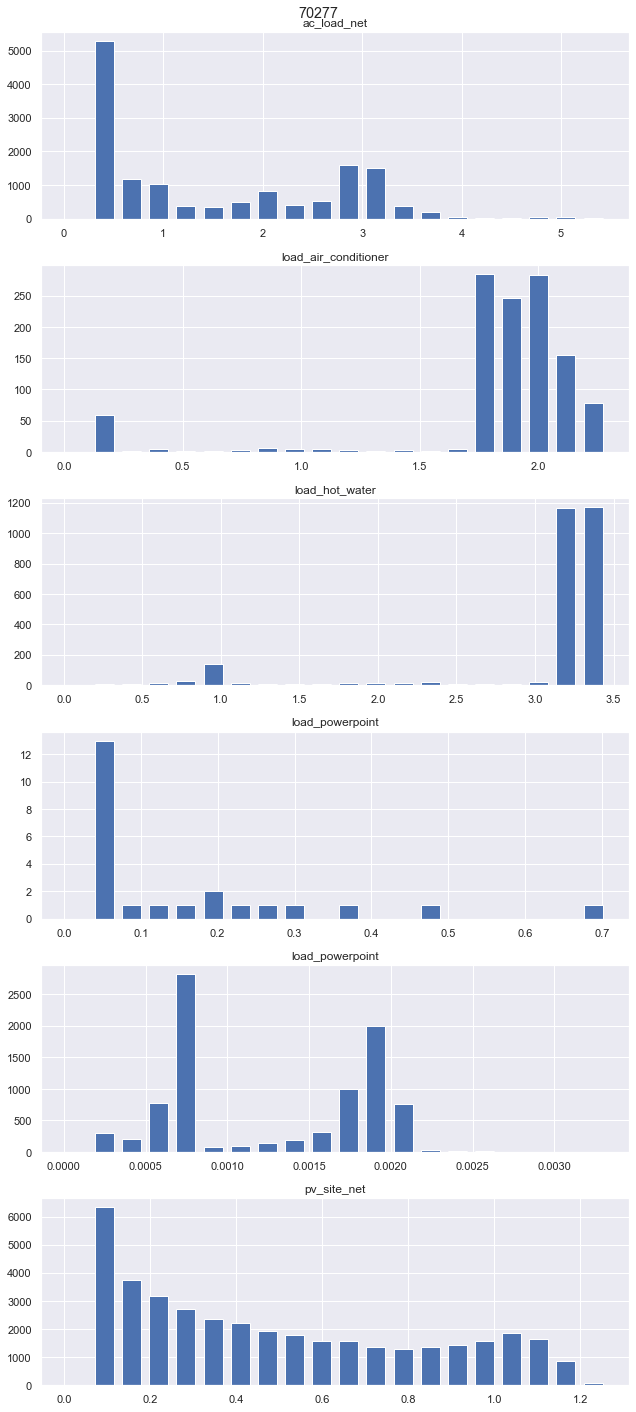

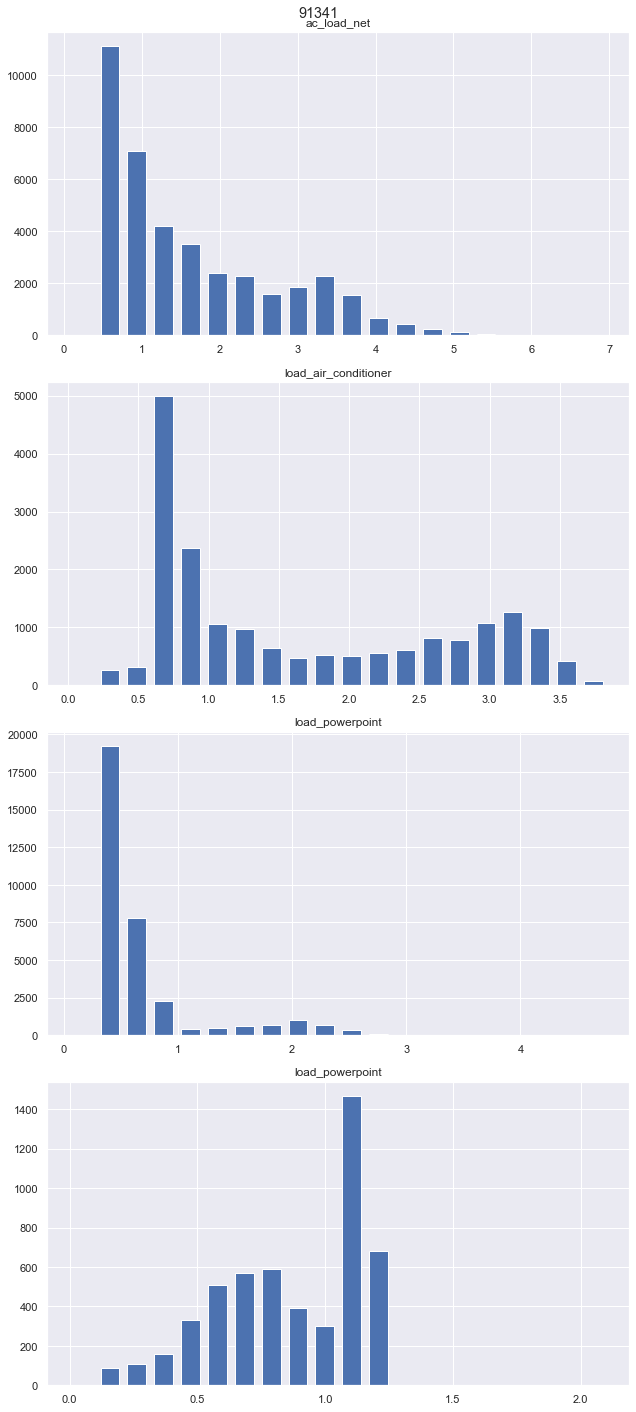

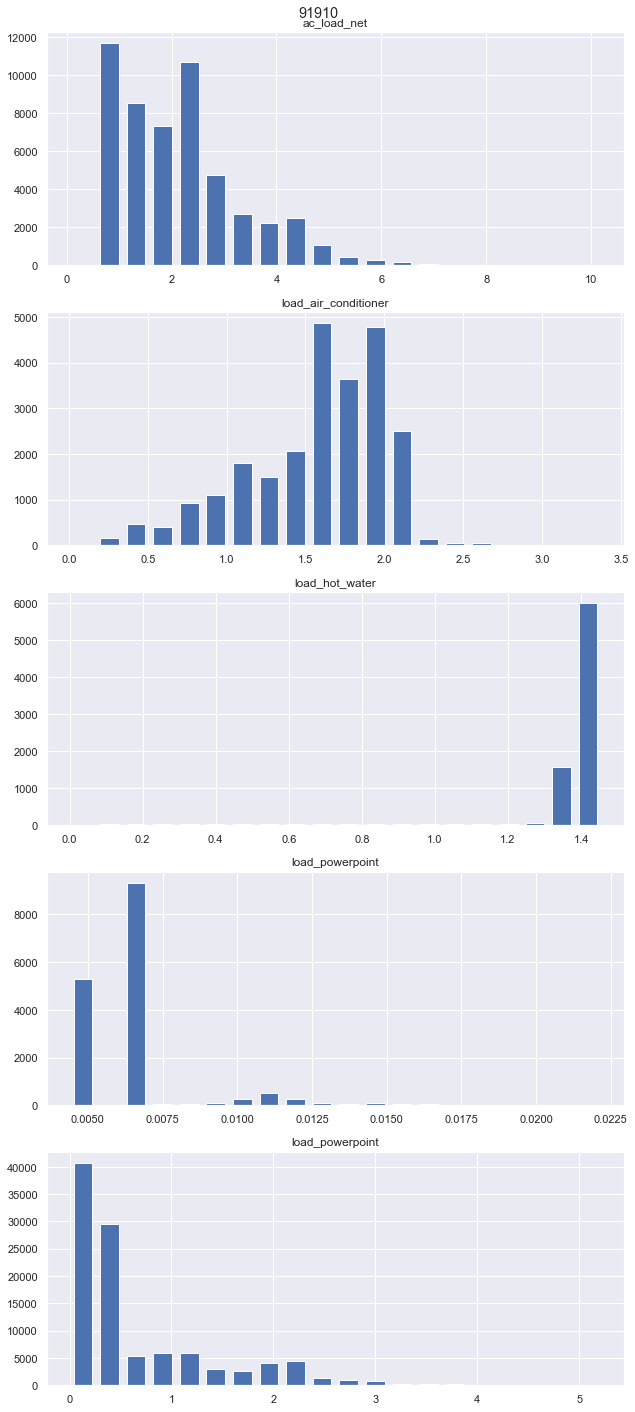

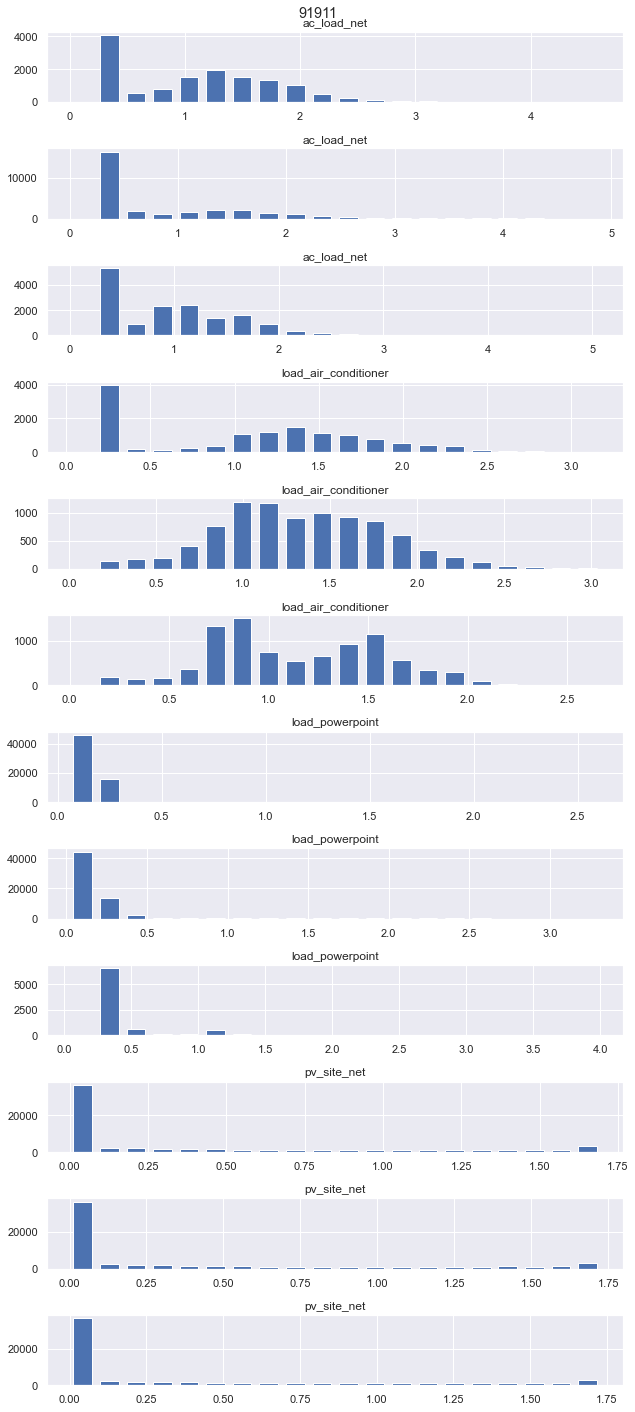

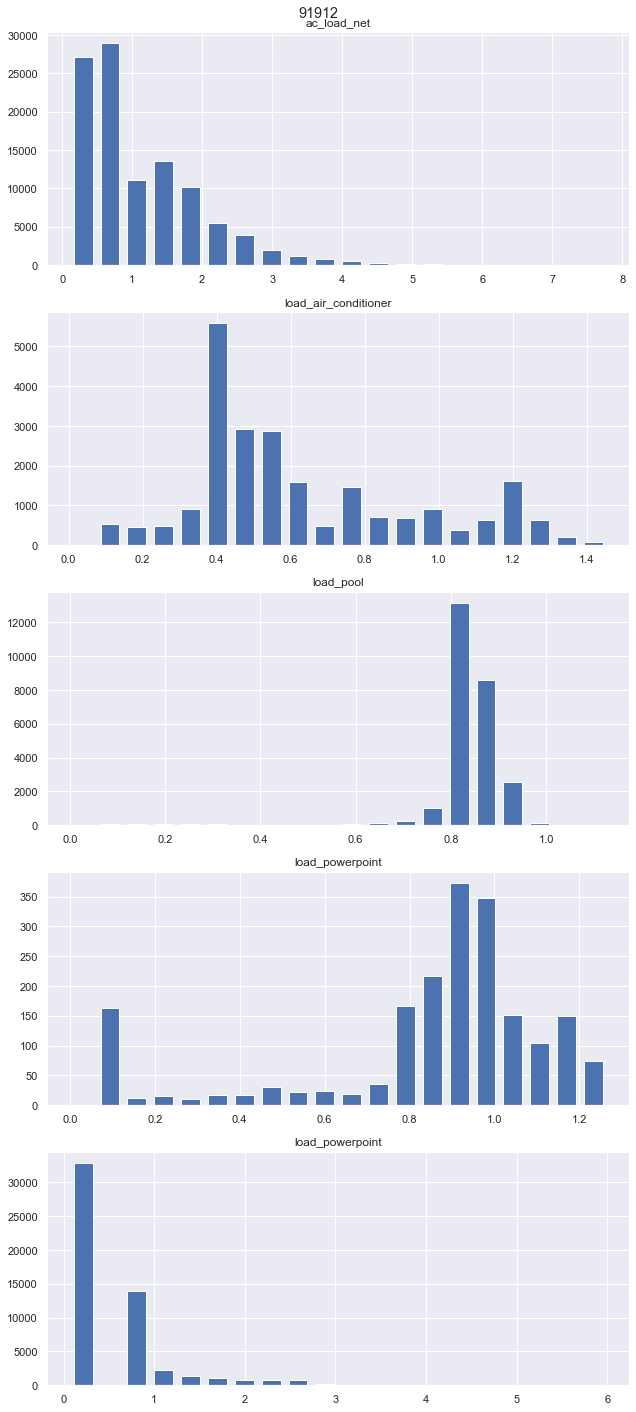

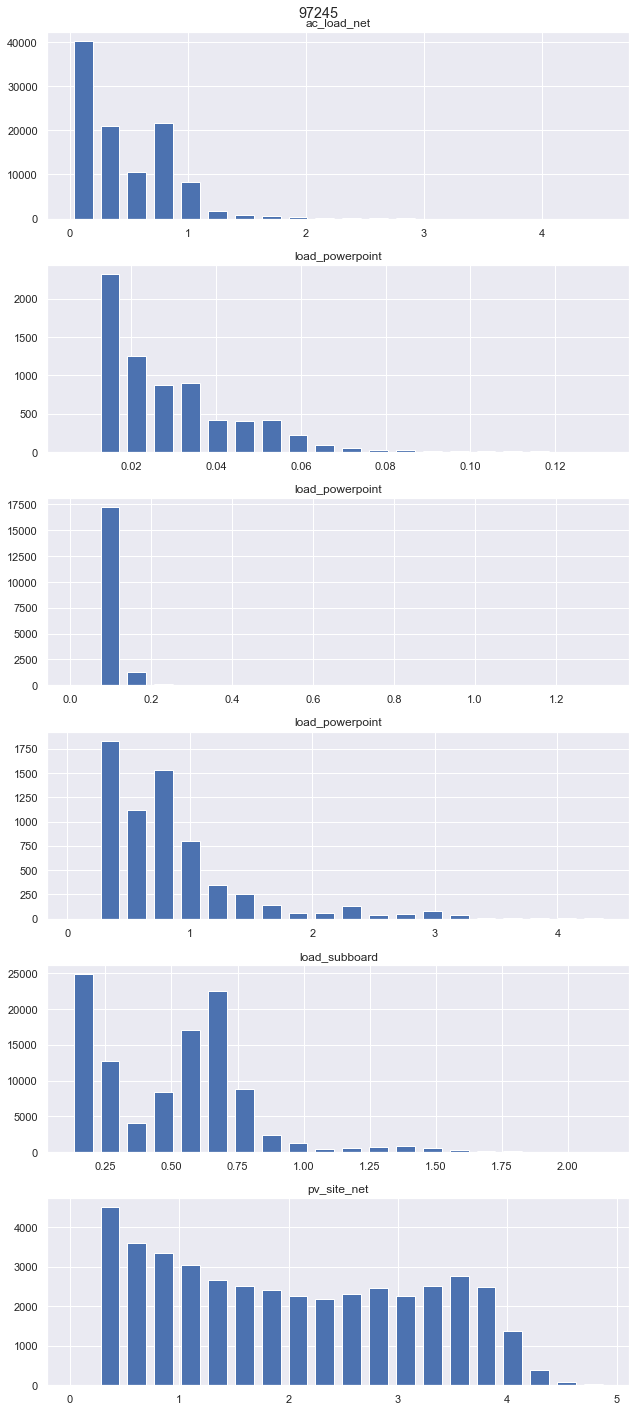

In [7]:
for id in ids:
    show_energy(id)